In [ ]:
!pip install qrcode[pil] requests

In [ ]:
import qrcode
from PIL import Image
from IPython.display import display
import requests
from io import BytesIO
def generuj_wizytowke_modern(dane, social_media, kolor_qr="black", kolor_tla="white", sciezka_logo=None):
   """
   Generuje nowoczesną wizytówkę biznesową wykorzystującą pola X-SOCIALPROFILE.
   """
   # --- 1. BUDOWANIE vCARD ---
   lines = [
       "BEGIN:VCARD",
       "VERSION:3.0",
       f"N;CHARSET=UTF-8:{dane.get('nazwisko', '')};{dane.get('imie', '')};;;",
       f"FN;CHARSET=UTF-8:{dane.get('imie', '')} {dane.get('nazwisko', '')}",
       f"ORG;CHARSET=UTF-8:{dane.get('organizacja', '')}",
       f"TITLE;CHARSET=UTF-8:{dane.get('stanowisko', '')}",
       f"TEL;TYPE=CELL:{dane.get('komorka', '')}",
       f"EMAIL;TYPE=WORK:{dane.get('email', '')}",
       f"URL;TYPE=WORK:{dane.get('strona_www', '')}",
       f"ADR;TYPE=WORK;CHARSET=UTF-8:;;{dane.get('adres', '')}",
   ]
   # Iteracja po słowniku social media i dodawanie dedykowanych pól
   # Format: X-SOCIALPROFILE;type=linkedin:http://...
   for platforma, url in social_media.items():
       platforma_lower = platforma.lower()
       lines.append(f"X-SOCIALPROFILE;TYPE={platforma_lower}:{url}")
       # Dodatkowo dla pewności (niektóre Androidy wolą to) dodajemy jako alternatywny URL
       # lines.append(f"URL;TYPE={platforma_lower}:{url}")
   lines.append("END:VCARD")
   vcard_string = "\n".join([l for l in lines if not l.endswith(':')])
   # --- 2. GENEROWANIE KODU QR (HIGH ERROR CORRECTION) ---
   qr = qrcode.QRCode(
       version=None,
       error_correction=qrcode.constants.ERROR_CORRECT_H, # Najwyższy poziom korekcji (30%)
       box_size=10,
       border=1, # Minimalistyczna ramka
   )
   qr.add_data(vcard_string.encode('utf-8'))
   qr.make(fit=True)
   # --- 3. STYLIZACJA I LOGO ---
   qr_img = qr.make_image(fill_color=kolor_qr, back_color=kolor_tla).convert('RGBA')
   if sciezka_logo:
       try:
           if sciezka_logo.startswith('http'):
               response = requests.get(sciezka_logo)
               logo = Image.open(BytesIO(response.content))
           else:
               logo = Image.open(sciezka_logo)
           # Skalowanie logo
           qr_width, qr_height = qr_img.size
           logo_max_size = qr_width // 3.5
           w_percent = (logo_max_size / float(logo.size[0]))
           h_size = int((float(logo.size[1]) * float(w_percent)))
           logo = logo.resize((int(logo_max_size), h_size), Image.Resampling.LANCZOS)
           # Centrowanie
           pos = ((qr_width - logo.size[0]) // 2, (qr_height - logo.size[1]) // 2)
           # Białe tło pod logo (dla czytelności)
           bg_logo = Image.new("RGBA", logo.size, "white")
           qr_img.paste(bg_logo, pos)
           qr_img.paste(logo, pos, logo if "A" in logo.getbands() else None)
       except Exception as e:
           print(f"Błąd logo: {e}")
   return qr_img

Błąd logo: cannot identify image file <_io.BytesIO object at 0x7fa34be51490>
--- WIZYTÓWKA (vCard Social Profile) ---


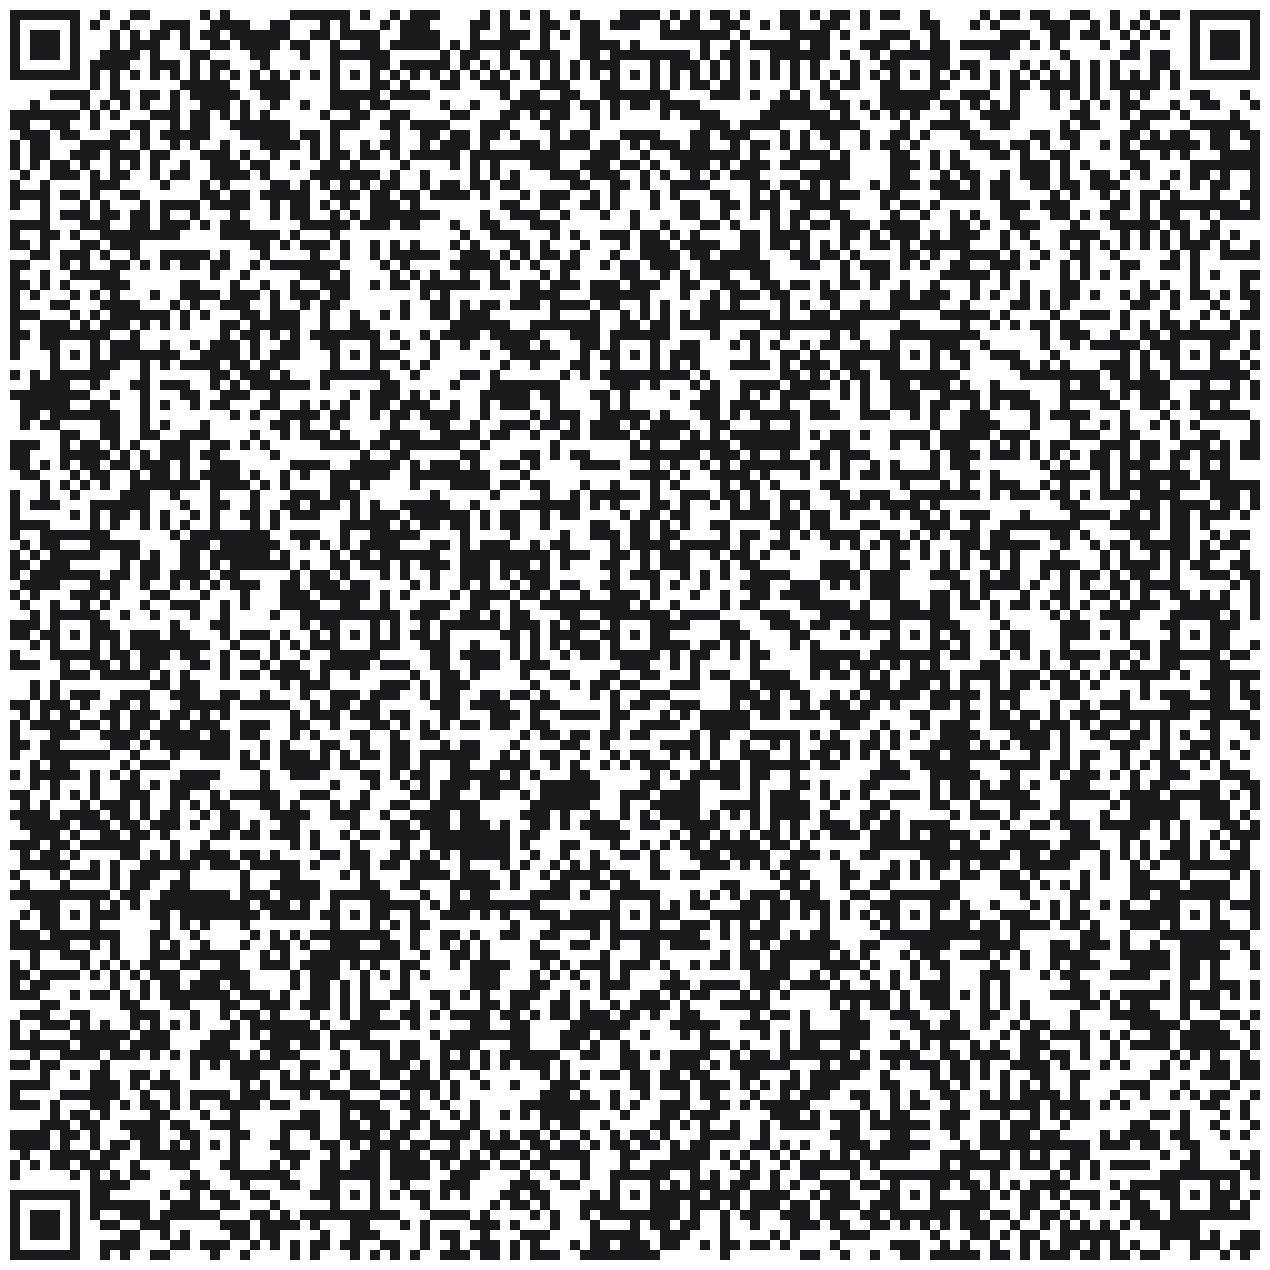

In [ ]:
# --- DANE OSOBOWE ---
dane_osobowe = {
   "imie": "Krzysztof",
   "nazwisko": "Szmidt",
   "stanowisko": "CEO & Founder",
   "organizacja": "Future Tech 2077",
   "komorka": "+48 500 600 700",
   "email": "Krzyszof@futuretech.pl",
   "strona_www": "https://futuretech.pl",
   "adres": "ul. Sowice 11A;Poznań;;61-306;Polska"
}
# --- SOCIAL MEDIA (BEZ NOTATEK) ---
socials = {
   "linkedin": "https://www.linkedin.com/in/piotr-wisniewski",
   "twitter": "https://twitter.com/piotr_dev",
   "instagram": "https://instagram.com/piotr_life",
   "github": "https://github.com/piotr-code"
}
# --- DESIGN ---
# Używamy ciemnego grafitu
KOLOR = "#1A1A1D"
# Logo (przykładowe logo firmy/technologii)
LOGO = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/1200px-Python-logo-notext.svg.png"
# --- GENEROWANIE ---
img = generuj_wizytowke_modern(
   dane_osobowe,
   socials,
   kolor_qr=KOLOR,
   sciezka_logo=LOGO
)
print("--- WIZYTÓWKA (vCard Social Profile) ---")
display(img)
img.save("wizytowka.png")